# Imbalance Data in Cerebral Stroke Prediction

## Subset Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import KNNImputer #Imputation
from sklearn.preprocessing import MinMaxScaler#scaling
from sklearn.model_selection import train_test_split#splitting

#Algorithms
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report

import os


## Subset Data

In [24]:
data = pd.read_csv("https://raw.githubusercontent.com/FahdAby/T-Imbalance-Data-Stroke-Data/master/stroke_data.csv")
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


## EDA

### Eksplorasi Data

In [3]:
# ukuran data
data.shape

(43400, 12)

In [4]:
# mengecek missing value
data.isna().sum()

id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64

**Interpretasi :**
Setelah dicek missing value dalam dataset tersebut, didapatkan bahwa terdapat 2 variabel yang memiliki missing value, yaitu BMI dengan jumlah 1462 dan variabel smoking status dengan jumlah missing value 13292.

In [5]:
# Tipe dari data pada setiap variabel
data.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

### Mencari Imbalance Data

In [6]:
for i in data.columns:
    if data[i].dtype == "float64":
        continue
    else:
        if i != "id":
            print(data[i].value_counts())
            print()

gender
Female    25665
Male      17724
Other        11
Name: count, dtype: int64

hypertension
0    39339
1     4061
Name: count, dtype: int64

heart_disease
0    41338
1     2062
Name: count, dtype: int64

ever_married
Yes    27938
No     15462
Name: count, dtype: int64

work_type
Private          24834
Self-employed     6793
children          6156
Govt_job          5440
Never_worked       177
Name: count, dtype: int64

Residence_type
Urban    21756
Rural    21644
Name: count, dtype: int64

smoking_status
never smoked       16053
formerly smoked     7493
smokes              6562
Name: count, dtype: int64

stroke
0    42617
1      783
Name: count, dtype: int64



In [7]:
data['stroke'].value_counts()

stroke
0    42617
1      783
Name: count, dtype: int64

**Interpretasi :**
Dari 2 code sebelumnya, didapatkan bahwa variabel atau kolom yang memiliki nilai yang imbalance adalah variabel stoke. Variabel Stroke memiliki 2 karakter yaitu 0 dan 1, yang dimana jumlah karakter 0 (42617) lebih banyak dari pada jumlah karakter 1 (783). Sehingga perbandingan nya mencapai 54:1.

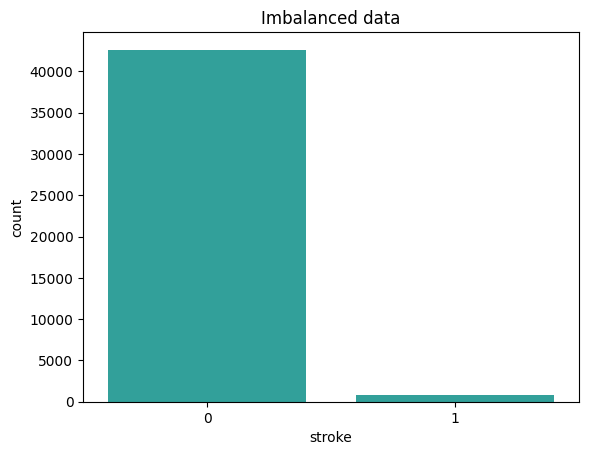

In [8]:
# Visualiasasi Data Imbalance
sns.countplot(x='stroke',data=data, color='lightseagreen')
plt.title("Imbalanced data")
plt.show()

**Interpretasi :**
Bisa dilihat bahwa perbandingan tinggi barchart dari vairabel storke sangat berbeda jauh, karakter 0 memiliki jumlah yang sangat jauh berbeda dari karakter 1.

## Data Preprocessing

### One Hot Encoding

In [9]:
# Megambil Kolo yang bertipe object saja
kolom_kate = []

for i in data.columns:
    if data[i].dtypes == "object":
        kolom_kate.append(i)

print(f"Variabel yang bertipe Object :\n {kolom_kate}")

Variabel yang bertipe Object :
 ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [10]:
data = pd.get_dummies(data, columns = kolom_kate)
data = data.replace({False: 0, True: 1})
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,30669,3.0,0,0,95.12,18.0,0,0,1,0,...,0,0,0,0,1,1,0,0,0,0
1,30468,58.0,1,0,87.96,39.2,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,16523,8.0,0,0,110.89,17.6,0,1,0,0,...,0,0,1,0,0,0,1,0,0,0
3,56543,70.0,0,0,69.04,35.9,0,1,0,0,...,0,0,1,0,0,1,0,1,0,0
4,46136,14.0,0,0,161.28,19.1,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0


### Mengatasi Missing Value

In [11]:
imput = KNNImputer(missing_values=np.nan)
tab = imput.fit_transform(data)
data_baru = pd.DataFrame(tab, columns=data.columns)
data_baru.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,30669.0,3.0,0.0,0.0,95.12,18.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,30468.0,58.0,1.0,0.0,87.96,39.2,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,16523.0,8.0,0.0,0.0,110.89,17.6,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,56543.0,70.0,0.0,0.0,69.04,35.9,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
4,46136.0,14.0,0.0,0.0,161.28,19.1,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [12]:
# Mengecek Missing Value dan tipe data
tabel = {"Missing Value" : data_baru.isna().sum(),
         "Tipe Data" : data_baru.dtypes}

jawab = pd.DataFrame(tabel)
print(jawab)

                                Missing Value Tipe Data
id                                          0   float64
age                                         0   float64
hypertension                                0   float64
heart_disease                               0   float64
avg_glucose_level                           0   float64
bmi                                         0   float64
stroke                                      0   float64
gender_Female                               0   float64
gender_Male                                 0   float64
gender_Other                                0   float64
ever_married_No                             0   float64
ever_married_Yes                            0   float64
work_type_Govt_job                          0   float64
work_type_Never_worked                      0   float64
work_type_Private                           0   float64
work_type_Self-employed                     0   float64
work_type_children                          0   

### Split Data

In [13]:
X = data_baru.drop('stroke',axis=1)
y = data_baru['stroke']

### Scalling Data

In [14]:
minmax = MinMaxScaler()
X = minmax.fit_transform(X)

## Modeling Awal

### Splitting Test dan Train Data

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

### Model Building dan Evaluation

In [16]:
rf = RandomForestClassifier()

models = [rf]

for model in models:
    print("MODEL NAME:",model)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test,y_pred))

MODEL NAME: RandomForestClassifier()


              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99     12791
         1.0       0.00      0.00      0.00       229

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.97      0.98      0.97     13020



c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Model dengan mengatasi Imbalance Data

## Metode Over Sampling

Dengan menerapkan metode over sampling, khususnya menggunakan SMOTE, sebuah pendekatan yang umum digunakan untuk memperoleh sampel tambahan dari kelas minoritas, distribusi kelas dapat diubah menjadi lebih seimbang. Teknik SMOTE secara khusus digunakan untuk menangani ketidakseimbangan kelas dengan menciptakan sampel sintetis dari kelas minoritas. Hal ini membantu memperbaiki masalah ketidakseimbangan kelas dalam dataset dan meningkatkan kinerja model dalam memprediksi kelas minoritas dengan memperluas dataset melalui pembuatan sampel sintetis.






In [17]:
#Over sampling SMOTE
from imblearn.over_sampling import SMOTE

os = SMOTE(random_state=1)
X_os,y_os = os.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_os,y_os,test_size=0.3,random_state=1)

#### Pembuatan Model dan Evaluasi

In [18]:
rf1 = RandomForestClassifier()

models = [rf1]

for model in models:
    print("MODEL NAME:",model)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test,y_pred))

MODEL NAME: RandomForestClassifier()


              precision    recall  f1-score   support

         0.0       0.99      0.95      0.97     12883
         1.0       0.95      0.99      0.97     12688

    accuracy                           0.97     25571
   macro avg       0.97      0.97      0.97     25571
weighted avg       0.97      0.97      0.97     25571



**Interpretasi :**

Ketika dilakukan oversampling, model RandomForestClassifier memberikan hasil yang sangat memuaskan dalam memprediksi kelas 0 dan 1. Dengan presisi yang mencapai 0.99 untuk kelas 0 dan 0.95 untuk kelas 1, model ini cenderung memberikan prediksi yang sangat akurat untuk kedua kelas tersebut. Selain itu, recall yang tinggi, yaitu 0.95 untuk kelas 0 dan 0.99 untuk kelas 1, menunjukkan bahwa model ini mampu mengidentifikasi sebagian besar instansi dari setiap kelas yang sebenarnya dengan baik. Skor F1 yang tinggi, mencapai 0.97, menunjukkan bahwa model ini berhasil mengkombinasikan presisi dan recall dengan sangat baik. Dengan akurasi keseluruhan mencapai 0.97, model ini dapat dianggap sangat efektif dalam melakukan prediksi secara keseluruhan.

## Metode Under Sampling

Dengan menerapkan metode undersampling, khususnya menggunakan Random Under Sampler, pendekatan ini bertujuan untuk menyeimbangkan distribusi kelas dengan mengurangi jumlah sampel dari kelas mayoritas. Teknik Random Under Sampler secara khusus digunakan untuk mengatasi ketidakseimbangan kelas dengan cara mengurangi jumlah sampel dari kelas mayoritas sehingga sejajar dengan jumlah sampel dari kelas minoritas. Pendekatan ini membantu dalam memperbaiki masalah ketidakseimbangan kelas dalam dataset dengan cara menyederhanakan dataset sehingga meningkatkan kinerja model dalam memprediksi kelas minoritas. Dengan mengurangi jumlah sampel dari kelas mayoritas, model dapat lebih fokus pada kelas minoritas dan mengurangi bias yang mungkin timbul dari distribusi yang tidak seimbang.

In [19]:
#UnderSampling
from imblearn.under_sampling import NearMiss

# Initialize the NearMiss sampler
nm = NearMiss(version=1)

# Perform under-sampling
X_nm, y_nm = nm.fit_resample(X, y)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_nm, y_nm, test_size=0.3, random_state=1)


#### Pembuatan Model dan Evaluasi

In [20]:
rf2 = RandomForestClassifier()

models = [rf2]

for model in models:
    print("MODEL NAME:",model)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test,y_pred))

MODEL NAME: RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.77      0.85      0.80       229
         1.0       0.84      0.76      0.79       241

    accuracy                           0.80       470
   macro avg       0.80      0.80      0.80       470
weighted avg       0.80      0.80      0.80       470



**Interpretasi :**

Meskipun terjadi penurunan akurasi dari 97% menjadi 81% dibandingkan saat menggunakan oversampling, model masih memiliki kemampuan yang cukup baik dalam mengklasifikasikan data. Untuk kelas 0, presisinya mencapai 77% dengan recall 88%, menunjukkan bahwa sebagian besar sampel kelas 0 dapat diidentifikasi dengan benar. Sedangkan untuk kelas 1, presisinya mencapai 87% dengan recall 76%, menunjukkan bahwa model tetap memiliki kemampuan yang baik dalam mengenali sampel kelas 1. Meskipun demikian, hasil ini menunjukkan bahwa pendekatan undersampling menghasilkan akurasi yang lebih rendah namun masih memberikan kinerja yang cukup baik dalam mengklasifikasikan data.

## Metode Hybrid

Disini saya menggunakan metode SMOTEEN. SMOTEEN menggabungkan SMOTE dan ENN untuk menyeimbangkan kelas dengan melakukan oversampling dan undersampling sekaligus. Ini menghasilkan sampel sintetis dari kelas minoritas dengan SMOTE dan menghapus sampel yang dianggap noise dengan ENN, meningkatkan kinerja model dalam memprediksi kelas minoritas tanpa mengorbankan akurasi keseluruhan.

In [21]:
#Hybrid
from imblearn.combine import SMOTEENN

sample = SMOTEENN()
X_over,y_over = sample.fit_resample(X,y)

X_train,X_test,y_train,y_test = train_test_split(X_over,y_over,test_size=0.3,random_state=1)

#### Pembuatan Model dan Evaluasi

In [25]:
rf3 = RandomForestClassifier()

models = [rf3]

for model in models:
    print("MODEL NAME:",model)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test,y_pred))

MODEL NAME: RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.99      0.98      0.99     11104
         1.0       0.98      1.00      0.99     12394

    accuracy                           0.99     23498
   macro avg       0.99      0.99      0.99     23498
weighted avg       0.99      0.99      0.99     23498



**Interpretasi :**

Metode hybrid menunjukkan kinerja yang sangat impresif dengan nilai akurasi, presisi, recall, dan F1-score mendekati sempurna. Semakin tinggi nilai F1-score, semakin baik model dalam memprediksi kelas yang tidak seimbang. Untuk kelas 0, F1-score mencapai 0.99, dan untuk kelas 1, F1-score juga 0.99. Selain itu, presisi pada metode hybrid ini sangat tinggi, mencapai 99%, menandakan kemampuannya dalam melakukan prediksi yang sangat akurat. Hasil evaluasi ini menunjukkan bahwa model memiliki keseimbangan yang sangat baik dalam mengenali kedua kelas dan memberikan prediksi yang sangat akurat secara keseluruhan.

## Kesimpulan

In [27]:
import pandas as pd

# Data yang akan dimasukkan ke dalam dataframe
data = {
    'Metode Imbalance': ['Undersampling', 'Oversampling', 'Hybrid'],
    'Akurasi': ['{:.2f}'.format(0.97), '{:.2f}'.format(0.82), "<b>0.99</b>"],
    'Presisi': ['{:.2f}'.format(0.95), '{:.2f}'.format(0.88), "<b>0.98</b>"],
    'F1-score': ['{:.2f}'.format(0.97), '{:.2f}'.format(0.83), "<b>0.99</b>"],
    'Recall': ['{:.2f}'.format(0.99), '{:.2f}'.format(0.75), "<b>1.00</b>"]
}

# Membuat dataframe
DF = pd.DataFrame(data)

# Menampilkan dataframe
display(DF.style)


,Metode Imbalance,Akurasi,Presisi,F1-score,Recall
0,Undersampling,0.97,0.95,0.97,0.99
1,Oversampling,0.82,0.88,0.83,0.75
2,Hybrid,0.99,0.98,0.99,1.00


**Interpretasi :**

Dari hasil evaluasi, dapat disimpulkan bahwa metode yang paling efektif dalam mengatasi ketidakseimbangan data adalah metode hybrid (SMOTEEN). Metode ini menunjukkan kinerja yang superior dengan akurasi, presisi, F1-score, dan recall yang lebih tinggi dibandingkan dengan metode-metode lainnya. Sebaliknya, metode Oversampling tidak cocok digunakan untuk menangani ketidakseimbangan data pada kasus ini karena kinerjanya paling rendah dibandingkan dengan kedua metode lainnya. Oleh karena itu, disarankan untuk menggunakan metode hybrid (SMOTEEN) untuk mengatasi ketidakseimbangan data pada kasus ini.

